In [1]:
"""Starting the coding of cascades."""

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def reaction_cycle(t, y, rate_constants):
    """Simulate enzymatic reaction cycle.

    In this case, the substrate goes to a product, then goes back to a
    substrate
    =========================================
    S + E1 --[k1/k11]--> C1 --[k2]--> P1 + E1
    P1 + E2 --[k3]--> C2 --[k4/k44]--> S + E2
    =========================================
    S: Substrate
    E1: Kinase // Enzyme 1
    C1: Complex 1
    P1: Product 1
    E2: Phosphate // Enzyme 2
    C2: Complex 2
    """
    s, c1, e1, p, c2, e2 = y
    ksc1, kcp1, kcs1, kcs2, kpc2, kcp2 = rate_constants
    if t >= 1 and t <= 3:
        sub_input = 1
    else:
        sub_input = 0
    dsdt = -ksc1 * s * e1 + kcs1 * c1 + kcs2 * c2 + sub_input
    dc1dt = ksc1 * s * e1 - kcs1 * c1 - kcp1 * c1
    de1dt = -ksc1 * s * e1 + kcs1 * c1 + kcp1 * c1
    dpdt = kcp1 * c1 - kpc2 * p * e2 + kcp2 * c2
    dc2dt = kpc2 * p * e2 - kcp2 * c2 - kcs2 * c2
    de2dt = -kpc2 * p * e2 + kcp2 * c2 + kcs2 * c2
    return [dsdt, dc1dt, de1dt, dpdt, dc2dt, de2dt]

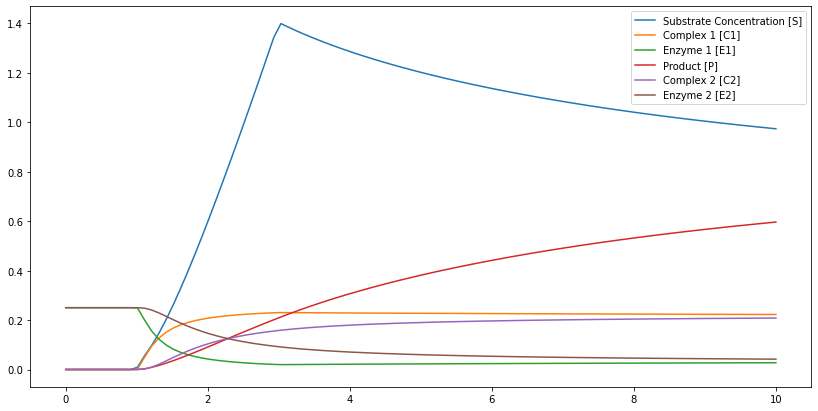

In [2]:
# Reaction Cycle Initializations###############################################
t_values = np.linspace(0, 10, 100)
# S0, C10, E10, P0, C20, E20
initial_values = [0, 0, 0.25, 0, 0, 0.25]
# ksc1, kcp1, kcs1, kcs2, kpc2, kcp2 = rate_constants
rate_constants = [[100, 2, 10, 2, 100, 10]]

solution = solve_ivp(
    fun=reaction_cycle,
    t_span=[0, 10],
    y0=initial_values,
    t_eval=t_values,
    args=rate_constants,
)

plt.figure(figsize=(14, 7))
plt.plot(solution.t, solution.y[0], label="Substrate Concentration [S]")
plt.plot(solution.t, solution.y[1], label="Complex 1 [C1]")
plt.plot(solution.t, solution.y[2], label="Enzyme 1 [E1]")
plt.plot(solution.t, solution.y[3], label="Product [P]")
plt.plot(solution.t, solution.y[4], label="Complex 2 [C2]")
plt.plot(solution.t, solution.y[5], label="Enzyme 2 [E2]")
plt.legend()
plt.show()